In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ecoli = pd.read_pickle('./../ecoli_organism_results.p')[0][0]
yeast = pd.read_pickle('./../yeast_organism_results.p')[0][0]
merged = ecoli.merge(yeast, on='regulator-target')

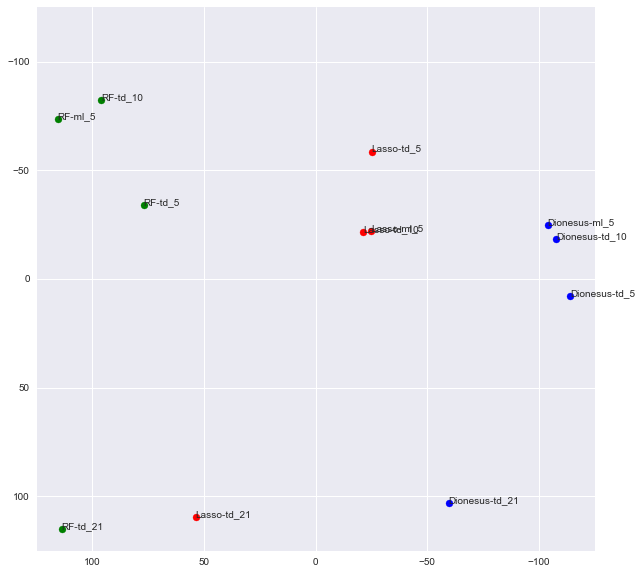

In [92]:
methods_of_interest = ['RF-td_5', 'RF-td_10', 'RF-td_21', 'Dionesus-td_5', 'Dionesus-td_10', 'Dionesus-td_21', 'Lasso-td_5', 'Lasso-td_10', 'Lasso-td_21', 'RF-ml_5', 'Dionesus-ml_5', 'Lasso-ml_5']
# methods_of_interest = ['RF-td_5', 'RF-td_10', 'RF-td_15','RF-td_21', 'Dionesus-td_5', 'Dionesus-td_10', 'Dionesus-td_15', 'Dionesus-td_21', 'Lasso-td_5', 'Lasso-td_10', 'Lasso-td_15', 'Lasso-td_21', 'RF-ml_0', 'RF-ml_1', 'RF-ml_2', 'RF-ml_3', 'RF-ml_4', 'RF-ml_5','Dionesus-ml_1', 'Dionesus-ml_2', 'Dionesus-ml_3', 'Dionesus-ml_4', 'Dionesus-ml_5', 'Lasso-ml_0', 'Lasso-ml_1', 'Lasso-ml_2', 'Lasso-ml_3', 'Lasso-ml_4', 'Lasso-ml_5']
X = ecoli.drop('regulator-target', 1).T
col = [ii for jj in methods_of_interest for ii in X.index if jj in ii]
X = X.loc[col]
pca = PCA()
X_r = pca.fit(X).transform(X)
f = plt.figure(figsize = (10,10) )
axes = f.gca()
plt.xlim([-125, 125])
plt.ylim([-125, 125])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


indices = [x for x in range(0,len(methods_of_interest))]
pcx, pcy = 1, 2
color_dict = {'RF': 'g', 'Dionesus': 'b', 'Lasso': 'r'}
#"gggbbbrrrgbr"
for i, target_name in zip(indices, methods_of_interest):
    color = color_dict[target_name.split('-')[0]]
    axes.scatter(X_r[i][pcx], X_r[i][pcy], c=color, label=target_name)
    axes.annotate(methods_of_interest[i], (X_r[i][pcx], X_r[i][pcy]))